<a href="https://colab.research.google.com/github/IshaSarangi/Edureka_Notes/blob/main/IMDB_Dataset_Setiment_Classification_using_RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1JE8Jjeppn1bubcvxcq44NjPPKXvEOpr7?usp=sharing

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
import matplotlib.pyplot as plt

In [2]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#Build RNN Model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=10000, output_dim=32, input_length=200))
model_rnn.add(SimpleRNN(units=128))
model_rnn.add(Dense(units=1, activation='sigmoid'))
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
#Build MSTM Model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=10000, output_dim=32, input_length=200))
model_lstm.add(LSTM(units=128))
model_lstm.add(Dense(units=1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
#Train both models
history_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.5209 - loss: 0.6934 - val_accuracy: 0.5210 - val_loss: 0.6919
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5764 - loss: 0.6743 - val_accuracy: 0.5950 - val_loss: 0.6857
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7096 - loss: 0.5594 - val_accuracy: 0.6749 - val_loss: 0.5921
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7845 - loss: 0.4714 - val_accuracy: 0.7404 - val_loss: 0.5618
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8270 - loss: 0.3969 - val_accuracy: 0.7595 - val_loss: 0.5060
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8373 - loss: 0.3715 - val_accuracy: 0.7690 - val_loss: 0.5298
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8767 - loss: 0.3080 - val_accuracy: 0.7509 - val_loss: 0.5504
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8348 - loss: 0.3765 - val

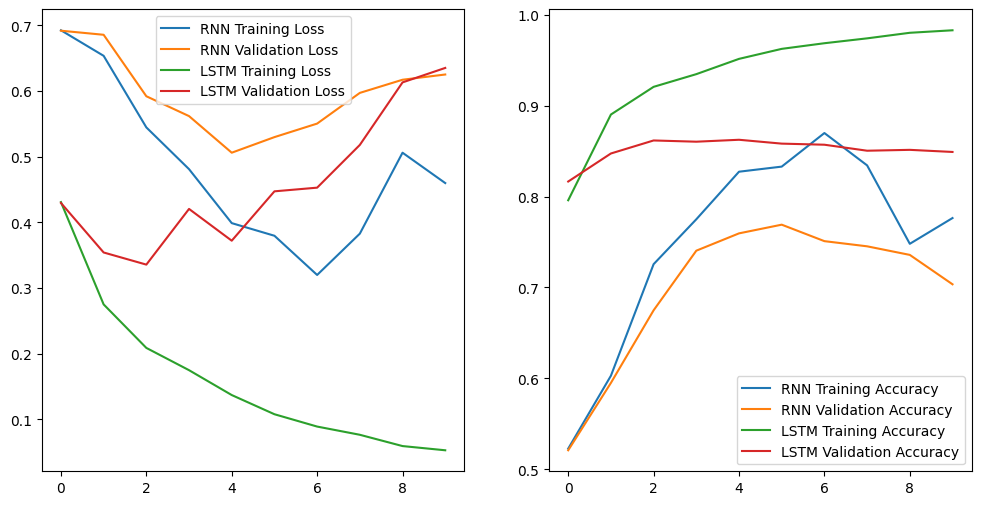

In [6]:
#Loss Comparisions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.legend()

#Accuracy Comparison
plt.subplot(1,2,2)
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')

plt.legend()
plt.show()